In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("google_trends.csv")
df

,month,search_freq
0,2004-01-01,0
1,2004-02-01,0
2,2004-03-01,0
3,2004-04-01,0
4,2004-05-01,0
...,...,...
220,2022-05-01,82
221,2022-06-01,78
222,2022-07-01,77
223,2022-08-01,77


In [3]:
df["search_freq"] = df.search_freq.astype(float)

In [4]:
df["month"] = pd.to_datetime(df["month"])

In [5]:
df.set_index("month", inplace=True)

In [36]:
import peakdetect

google_peaks = peakdetect.peakdetect(df.search_freq.values, df.index, lookahead=3)#, delta=4)
google_peaks

[[[numpy.datetime64('2018-02-01T00:00:00.000000000'), 49.0],
  [numpy.datetime64('2019-01-01T00:00:00.000000000'), 28.0],
  [numpy.datetime64('2019-10-01T00:00:00.000000000'), 59.0],
  [numpy.datetime64('2020-08-01T00:00:00.000000000'), 71.0],
  [numpy.datetime64('2021-03-01T00:00:00.000000000'), 100.0],
  [numpy.datetime64('2021-11-01T00:00:00.000000000'), 78.0],
  [numpy.datetime64('2022-05-01T00:00:00.000000000'), 82.0]],
 [[numpy.datetime64('2005-08-01T00:00:00.000000000'), 0.0],
  [numpy.datetime64('2018-06-01T00:00:00.000000000'), 15.0],
  [numpy.datetime64('2019-04-01T00:00:00.000000000'), 20.0],
  [numpy.datetime64('2020-03-01T00:00:00.000000000'), 39.0],
  [numpy.datetime64('2020-11-01T00:00:00.000000000'), 63.0],
  [numpy.datetime64('2021-06-01T00:00:00.000000000'), 66.0],
  [numpy.datetime64('2022-03-01T00:00:00.000000000'), 71.0]]]

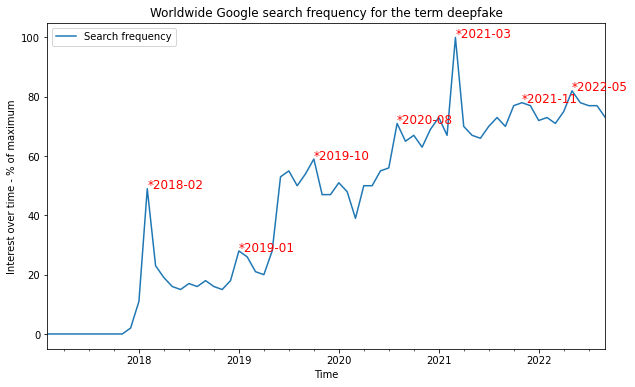

In [37]:
import matplotlib.pyplot as plt

ax = df[df.index>"2017"].plot()

for peak in google_peaks[0]:
    ax.annotate("*"+str(peak[0])[:7],xy=(peak[0],peak[1]), fontsize=12, color="red")

ax.set_title("Worldwide Google search frequency for the term deepfake")
ax.legend(["Search frequency"], loc='upper left')
ax.set_xlabel("Time")
ax.set_ylabel("Interest over time - % of maximum")
plt.gcf().set_size_inches(10, 6)
plt.show()

2018-02-01 https://variety.com/2018/digital/news/reddit-twitter-deepfake-ban-1202690627/

2019-01-01

2019-10-01 https://ai.facebook.com/blog/deepfake-detection-challenge/

2020-08-01 https://www.cnet.com/science/mit-releases-deepfake-video-of-nixon-announcing-nasa-apollo-11-disaster/
           https://www.theverge.com/2020/7/27/21339898/deepfake-audio-voice-clone-scam-attempt-nisos
           
2021-03-01 https://edition.cnn.com/videos/business/2021/03/02/tom-cruise-tiktok-deepfake-orig.cnn-business
           https://www.nytimes.com/2021/03/14/us/raffaela-spone-victory-vipers-deepfake.html

2021-11-01

2022-05-01

In [ ]:
df[df.index.year >= 2018]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df[df.index.year >= 2018].search_freq).fit()
forecast = model.forecast(10)
forecast

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df[df.index.year >= 2018].search_freq, order=(12,1,1)).fit()
forecast = model.forecast(24)
forecast.plot()

In [ ]:
#!pip install pmdarima
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

model = auto_arima(df[df.index.year >= 2018], start_p=0, start_q=0)
#model.fit(df)

def forecast_to_df(model, steps=32):
    forecast, conf_int = model.predict(n_periods=steps, return_conf_int=True)
    pred_df=pd.DataFrame()
    pred_df["lower"] = conf_int[:,0]
    pred_df["upper"] = conf_int[:,1]
    pred_df["pred"] = forecast.values
    return pred_df

pred_df = forecast_to_df(model)

print(model)

# Plotting Predictions
def plot_train_test_pred(train,test,pred_df):
    fig,ax = plt.subplots(figsize=(12,7))
    kws = dict(marker='o')
    
    ax.plot(train,label='Train',**kws)
    #ax.plot(test,label='Test',**kws)
    ax.plot(pred_df['pred'],label='Prediction',ls='--',linewidth=3)

    ax.fill_between(x=pred_df.index,y1=pred_df['lower'],y2=pred_df['upper'],alpha=0.3)
    ax.set_title('Model Validation', fontsize=22)
    ax.legend(loc='upper left')
    fig.tight_layout()
    return fig,ax

#plot_train_test_pred(df, None, pred_df)

pred_df.pred.plot()

In [ ]:
df.diff(1).plot()

In [ ]:
df.plot()

In [ ]:
df.describe()